# Read input

In [28]:
input00 = open("input00.txt").readlines()

In [29]:
#print(input00)
numTrainingData, numFeatures = (int(s) for s in input00[0].split())

# Create numpy arrays to store training features and answers

In [30]:
import numpy as np
trainingFeatures = np.zeros(shape=(numTrainingData, numFeatures))
trainingAnswers = np.zeros(shape=(numTrainingData,))

# Extract features from input dataset

In [31]:
inputFeatures = input00[1:numTrainingData+1]

In [15]:
len(inputFeatures)

4500

# Clean dataset, remove unnecessary characters and store in arrays

In [32]:
for entryNum in range(trainingFeatures.shape[0]):
    entry = inputFeatures[entryNum].split()
    #print(entry)
    trainingAnswers[entryNum] = float(entry[1])
    params = [entry[i] for i in range(2, numFeatures + 2)]
    cleanedParams = [param[param.index(":") + 1:] for param in params]
    trainingFeatures[entryNum] = np.array([float(param) for param in cleanedParams])

In [33]:
numTestData = int(input00[numTrainingData+1])
print(numTestData)

500


In [34]:
testFeatures = np.zeros(shape=(numTestData, numFeatures))
testNames = []

# Exract test features

In [35]:
inputTestFeatures = input00[numTrainingData+2:numTrainingData+2+numTestData]
#print(inputTestFeatures)

In [24]:
len(inputTestFeatures)

500

# Clean dataset, remove unnecessary characters and store in arrays

In [36]:
for entryNum in range(testFeatures.shape[0]):
    entry = inputTestFeatures[entryNum].split()
    testNames.append(entry[0])
    params = [entry[i] for i in range(1, numFeatures + 1)]
    cleanedParams = [param[param.index(":") + 1:] for param in params]
    testFeatures[entryNum] = np.array([float(param) for param in cleanedParams])

# Read expected answers for test dataset

In [37]:
content = open("output00.txt").readlines()
content = [line.strip('\n') for line in content]
cleanedContent = [entry[entry.index(" ") + 1:] for entry in content]

testAnswers = np.array([float(s) for s in cleanedContent])

In [38]:
trainingFeatures[:,1].T

array([ 4.797982,  3.151926,  1.785813, ...,  0.      ,  1.333277,
        1.940548])

# Visualize Features, Exploratory data analysis

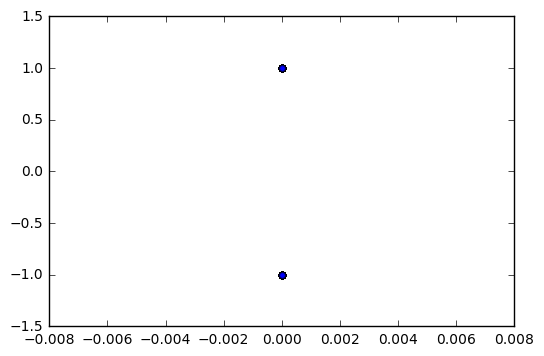

In [196]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trainingFeatures[:,22].T, trainingAnswers,  alpha=.1)
plt.show()

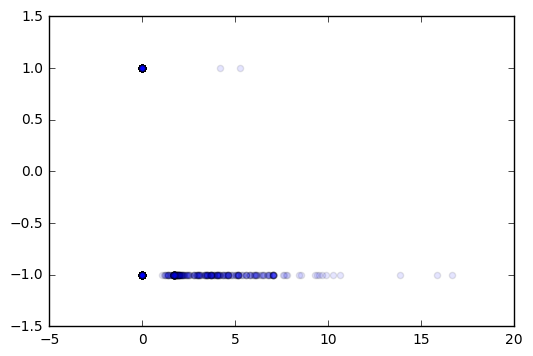

In [76]:
fig, ax = plt.subplots()
ax.scatter(trainingFeatures[:,7].T, trainingAnswers, alpha=.1)
plt.show()

# Perform Logistic Regression

In [39]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()

In [40]:
trainingSlice = trainingFeatures[:, [1]]
logit.fit(trainingSlice, trainingAnswers)
testingSlice = testFeatures[:, [1]]
predictions = logit.predict(testingSlice)

In [172]:
logit.score(testFeatures[:, [1]],testAnswers)

0.78000000000000003

In [169]:
predictProbs = logit.predict_proba(testingSlice)

# Use a heuristic to improve accuracy rate based on visual analysis

In [41]:
newPredictions = np.zeros(testAnswers.shape)
for num, prediction in enumerate(predictions):
    if testFeatures[num][7] > 0 or testFeatures[num][6] > 0 or testFeatures[num][13] > 0:
        #print("yes")
        newPredictions[num] = -1
    else:
        newPredictions[num] = predictions[num]

In [42]:
print(np.mean( predictions != testAnswers ))

0.22


In [45]:
print(np.mean( newPredictions != testAnswers ))

0.188
